In [2]:
%load_ext autoreload
%autoreload 2

import sys

sys.path.insert(0, "../src")

We're working through this again, after modularizing code from the previous notebook.
It looks our code is incorrect, so we'll need to fix it before we can move on.

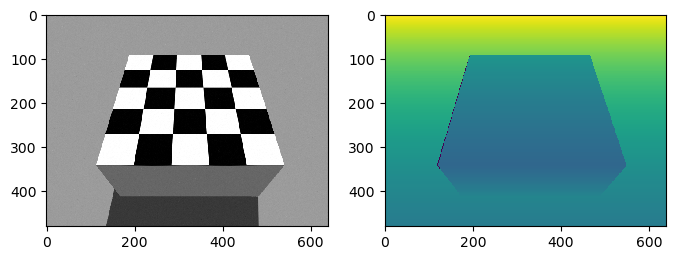

In [3]:
from camera import (
    move_camera_pos,
    get_camera_image_rgb,
    get_camera_image_depth,
    find_chessboard_corners_depth,
    generate_world_chessboard_corners,
    compute_chessboard_mask,
    compute_valid_chessboard_points,
    compute_dlt,
)
import numpy as np
import matplotlib.pyplot as plt
import cv2
import rospy

rospy.init_node("camera_test")
move_camera_pos(-1, 0, 1.5, pitch=0.9)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(get_camera_image_rgb())
ax[1].imshow(get_camera_image_depth())
plt.show()

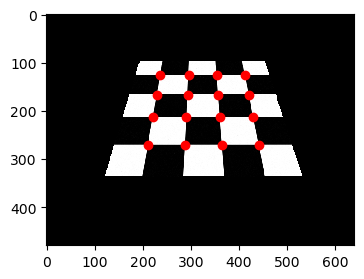

In [4]:
rgb = get_camera_image_rgb()
depth = get_camera_image_depth()

camera_corners = find_chessboard_corners_depth(rgb, depth, (4, 4))
mask = compute_chessboard_mask(rgb)
world_corners = generate_world_chessboard_corners((4, 4), 1, 0.5)

# plot the corners on the image with mask
masked_rgb = rgb.copy() * mask[:, :, np.newaxis]

plt.figure(figsize=(4, 3))
plt.imshow(masked_rgb)
plt.scatter(camera_corners[:, 0], camera_corners[:, 1], c="r")
plt.show()

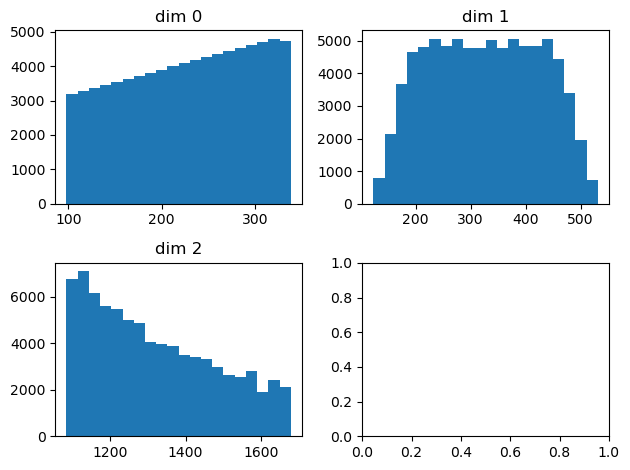

In [33]:
def hist_dims(X, **kwargs):
    fig, ax = plt.subplots(2, 2, **kwargs)
    axes = ax.flatten()
    for i in range(X.shape[1]):
        axes[i].hist(X[:, i], bins=20)
        axes[i].set_title(f"dim {i}")
    plt.tight_layout()


valid = compute_valid_chessboard_points(mask, depth)
hist_dims(valid)
plt.show()

In [14]:
camera_corners.shape

(16, 3)

In [35]:
# add a new column to valid with 1s
np.hstack([valid, np.ones((valid.shape[0], 1))]).shape

(80547, 4)

In [44]:
(P @ X.T).shape

(3, 80547)

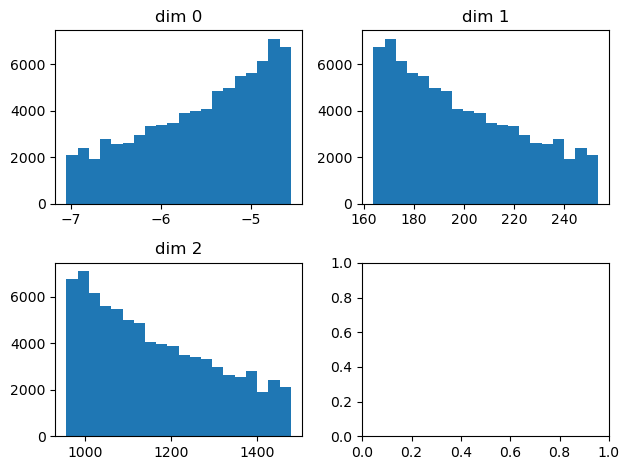

In [46]:
P = compute_dlt(camera_corners, world_corners)
X = np.hstack([valid, np.ones((valid.shape[0], 1))])
hist_dims((P @ X.T).T)

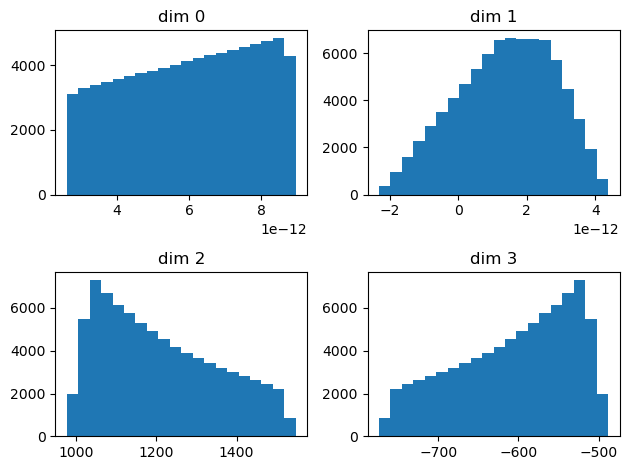

In [50]:
hist_dims(valid @ P)